In [1]:
import sklearn
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display 
import glob
import numpy as np
import sys
from sklearn import svm
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import NearestNeighbors
%matplotlib inline

## Read Data

In [2]:
ones = glob.glob('./HodaSmallSubset/one/*.png')
twos = glob.glob('./HodaSmallSubset/two/*.png')
fives = glob.glob('./HodaSmallSubset/five/*.png')

In [3]:
oneImage = []
for i in range(len(ones)):
    img = np.array(Image.open(ones[i]))
    oneImage.append(img)

twoImage = []
for i in range(len(twos)):
    img = np.array(Image.open(twos[i]))
    twoImage.append(img)

fiveImage = []
for i in range(len(fives)):
    img = np.array(Image.open(fives[i]))
    fiveImage.append(img)


## Descriptor

In [4]:
def descriptor(img):
    dim = (3,3)
    resized = cv.resize(img, dim, interpolation=cv.INTER_AREA)
#     resized = cv.resize(img, dim)
    return resized.flatten()

## Training

In [5]:
X = []
Y = []

for i in oneImage:
    des = descriptor(i)
    X.append(des)
    Y.append(1)

for i in twoImage:
    des = descriptor(i)
    X.append(des)
    Y.append(2)

for i in fiveImage:
    des = descriptor(i)
    X.append(des)
    Y.append(5)

In [6]:
clf = svm.SVC(gamma=0.00001)
clf.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Test

In [7]:
test = glob.glob('./HodaSmallSubset/test/*.png')

In [10]:
testImage = []
test_labels = []
for i in range(len(test)):
    if i < 50:
        test_labels.append(1)
    elif i <100:
        test_labels.append(2)
    elif i < 150:
        test_labels.append(5)
    img = np.array(Image.open(test[i]))
    testImage.append(img)

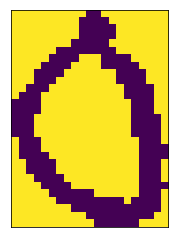

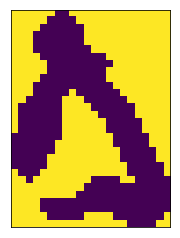

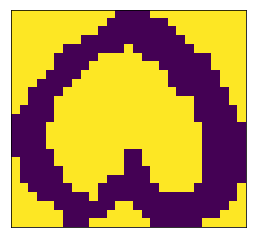

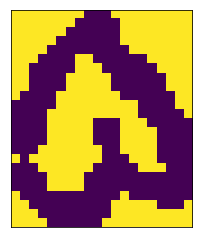

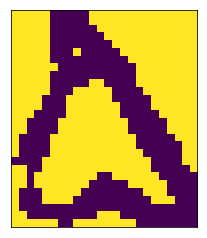

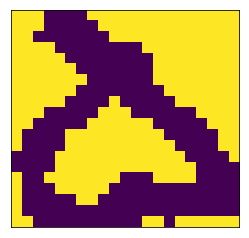

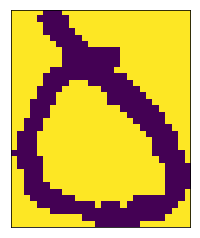

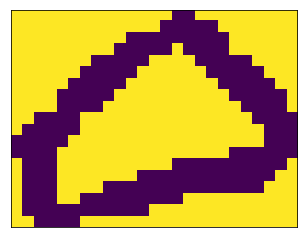

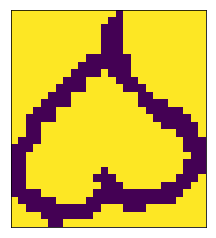

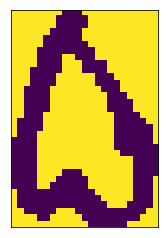

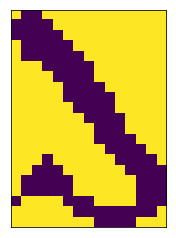

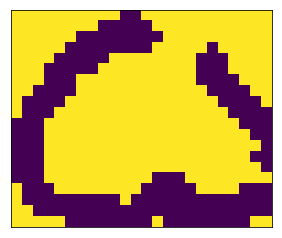

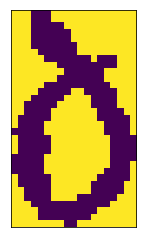

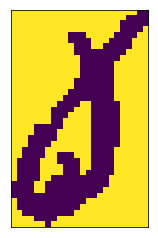

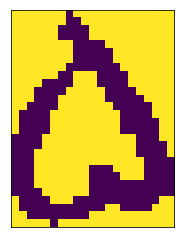

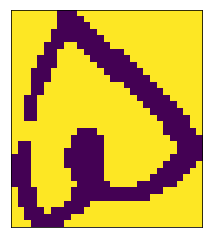

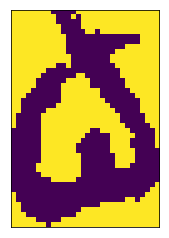

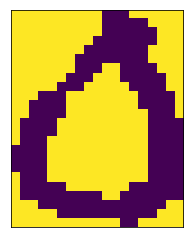

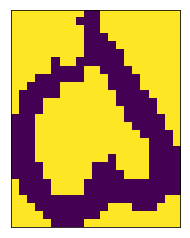

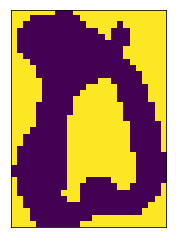

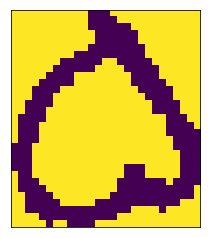

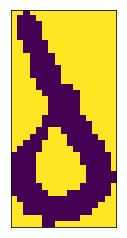

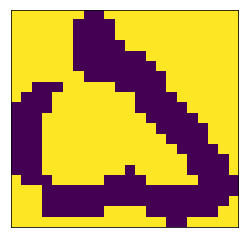

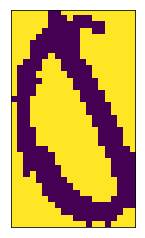

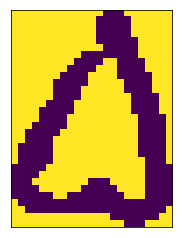

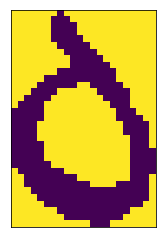

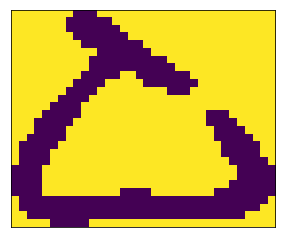

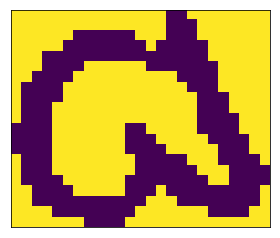

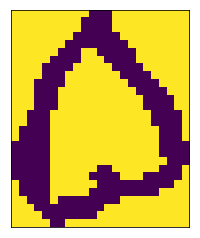

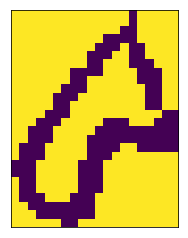

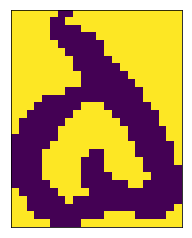

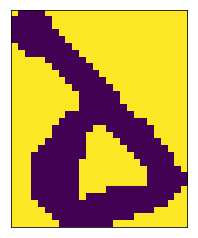

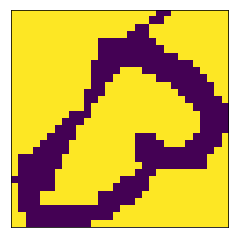

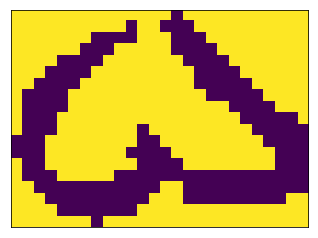

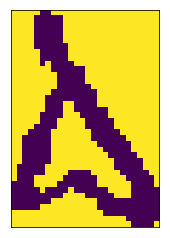

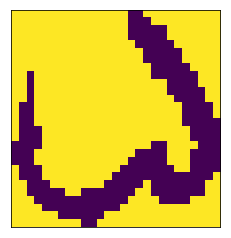

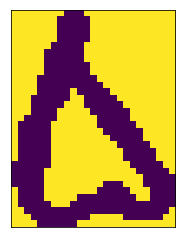

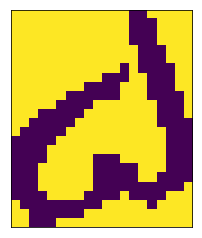

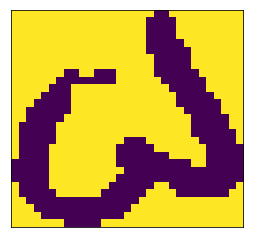

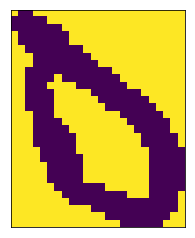

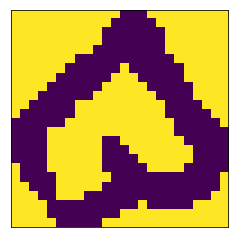

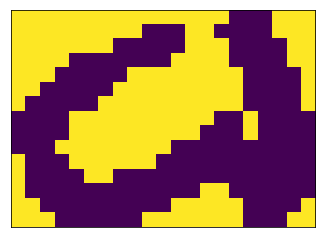

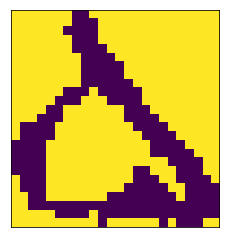

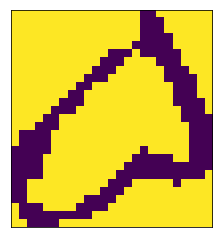

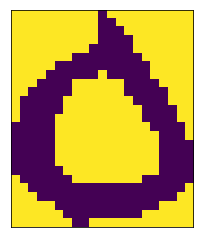

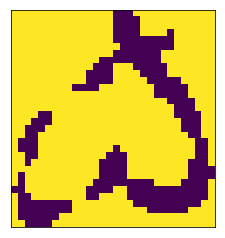

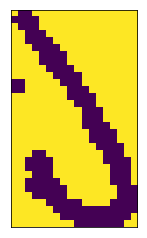

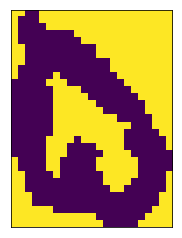

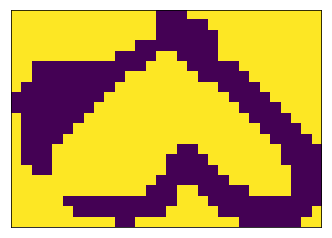

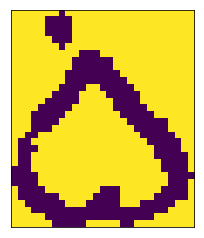

100.0

One-recognized samples count  = 50
Two-recognized samples count  = 50
Five-recognized samples count  = 50


In [17]:
o = t = f = 0
predicts = []
for i in testImage:
    des = descriptor(i)
    res = clf.predict([des])
    predicts.append(res)
#     print(res)
    if res[0]==1:
        o+=1
#         plt.imshow(i)
#         plt.xticks([]), plt.yticks([])
#         plt.show()
    elif res[0]==2:
        t+=1
#         plt.imshow(i)
#         plt.xticks([]), plt.yticks([])
#         plt.show()
    elif res[0]==5:
        f+=1
        plt.imshow(i)
        plt.xticks([]), plt.yticks([])
        plt.show()

print (np.mean(predicts==test_labels) * 100)        
print()
print('One-recognized samples count  = ' + str(o))
print('Two-recognized samples count  = ' + str(t))
print('Five-recognized samples count  = ' + str(f))